In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/x_train.csv')
df2 = pd.read_csv('data/y_train.csv')
x_train = df.iloc[:, -10:].copy()
y_train = df2.iloc[:, -10:].copy()

## Correlation

In [44]:
feature = '_PAREC1'
tx = x_train.copy()
y = y_train.copy()
df = pd.concat([tx[feature], y], axis=1)
df2 = df[df['_MICHD'] == 1].groupby([feature]).count().reset_index()
df3 = df.groupby([feature]).count().reset_index()
#df2['ratio'] = df2['_MICHD'] / df3['_MICHD']
df


,_PAREC1,_MICHD
0,1,0
1,9,0
2,4,0
3,2,0
4,9,0
...,...,...
328130,2,0
328131,1,0
328132,3,0
328133,3,0


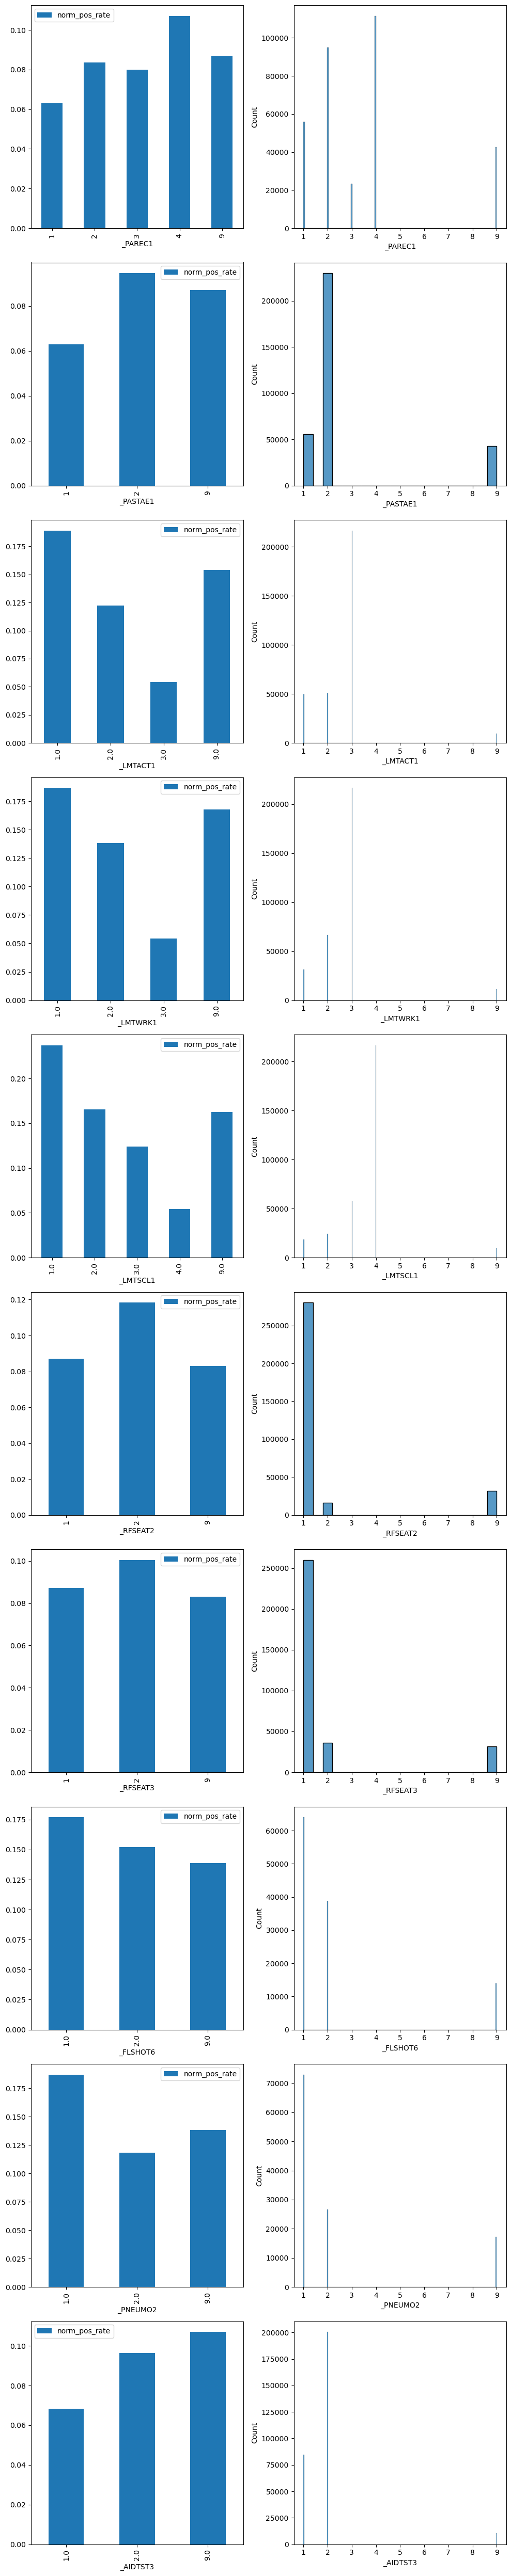

In [38]:
def plot_feature(tx, y):
    num_features = len(tx.columns)
    fig, axes = plt.subplots(num_features, 2, figsize=(10, 5*num_features), tight_layout=True)
    for i, feature in enumerate(tx.columns):
        df = pd.concat([tx[feature], y], axis=1)
        df2 = df[df['_MICHD'] == 1].groupby([feature]).count().reset_index()
        df3 = df.groupby([feature]).count().reset_index()
        df2['norm_pos_rate'] = df2['_MICHD'] / df3['_MICHD']
        df2.plot(kind='bar', x=feature, y='norm_pos_rate', ax=axes[i][0])
        sns.histplot(tx[feature], ax=axes[i][1])
plot_feature(x_train, y_train)

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(x_train_f1.corr(), fmt='.2f')

# 2nd filter makes a set with the features that are not correlated with each other

In [ ]:
features = x_train.columns
rows, cols = [int(len(features)**0.5)]*2
fig, axes = plt.subplots(rows, cols, figsize=(10, 10), tight_layout=True)
count = 0
for i in range(rows):
    for j in range(cols):
        axes[i, j].scatter(x_train.iloc[:, count], y_train)
        axes[i, j].set_title(features[count])
        count += 1

In [ ]:
fig = plt.figure(figsize=(5, 5))
sns.histplot(x_train.iloc[:, 0])
plt.xlim(0, 1000)
plt.ylim(0, 20000)

## Train the model

In [ ]:
from implementations import least_squares, ridge_regression

weights, mse = least_squares(y_train, x_train_f1)

print("Weights: " + str(weights) + "\nMSE: " + str(mse))